In [1]:
import os
#import skimage
import torch
from torchvision import transforms
import numpy as np
import glob
from skimage import io
import skimage
import matplotlib.pyplot as plt
from Custom_dataloader import *
from Transforms import phantom_segmentation
from Transforms import entropy_mark_transform
from Transforms import hsv_stats_transfrom
from Transforms import lab_stats_transfrom
from Transforms import black_perc_transfrom
import matplotlib.pyplot as plt

#DB="/run/user/1000/gvfs/afp-volume:host=MyCloudPR4100.local,user=admin,volume=Paltas_DataBase/Data_Base"
DB="//MYCLOUDPR4100/Paltas_DataBase/Data_Base_v2"
d_t=transforms.Compose([phantom_segmentation(False)])

datar=Dataset_direct(root_dir=DB,ImType=['PhantomRGB'],Intersec=False)

In [2]:
datar[0]

{'PhantomRGB': array([[[44, 39, 35],
         [44, 39, 35],
         [46, 41, 37],
         ...,
         [25, 24, 20],
         [25, 24, 20],
         [25, 24, 20]],
 
        [[50, 45, 41],
         [49, 44, 40],
         [49, 44, 40],
         ...,
         [24, 23, 19],
         [25, 24, 20],
         [25, 24, 20]],
 
        [[56, 51, 47],
         [53, 48, 44],
         [52, 47, 43],
         ...,
         [24, 23, 19],
         [24, 23, 19],
         [25, 24, 20]],
 
        ...,
 
        [[68, 61, 55],
         [66, 59, 53],
         [69, 62, 56],
         ...,
         [72, 69, 62],
         [64, 61, 54],
         [58, 55, 48]],
 
        [[69, 62, 56],
         [70, 63, 57],
         [72, 65, 59],
         ...,
         [75, 72, 65],
         [74, 71, 64],
         [73, 70, 63]],
 
        [[71, 64, 58],
         [71, 64, 58],
         [72, 65, 59],
         ...,
         [78, 75, 68],
         [84, 81, 74],
         [87, 84, 77]]], dtype=uint8),
 'PhantomRGB_metadata': {'GP

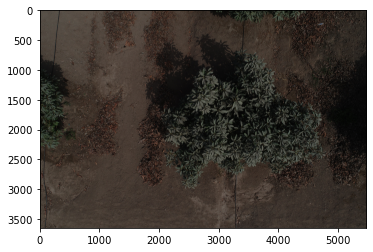

In [63]:
img=io.imread(datar.DATA['PhantomRGB']["data"][1])
plt.imshow(img)

In [64]:
from Transforms import seg_mask

In [65]:
re=seg_mask(img)

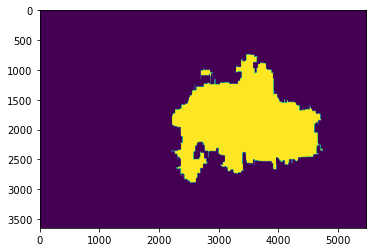

In [66]:
plt.imshow(re[0])

In [92]:
from skimage import segmentation
m_slic=segmentation.slic(img,5,min_size_factor=0.2,mask=re[0],slic_zero=False)

Text(0.5, 1.0, 'maskSLIC')

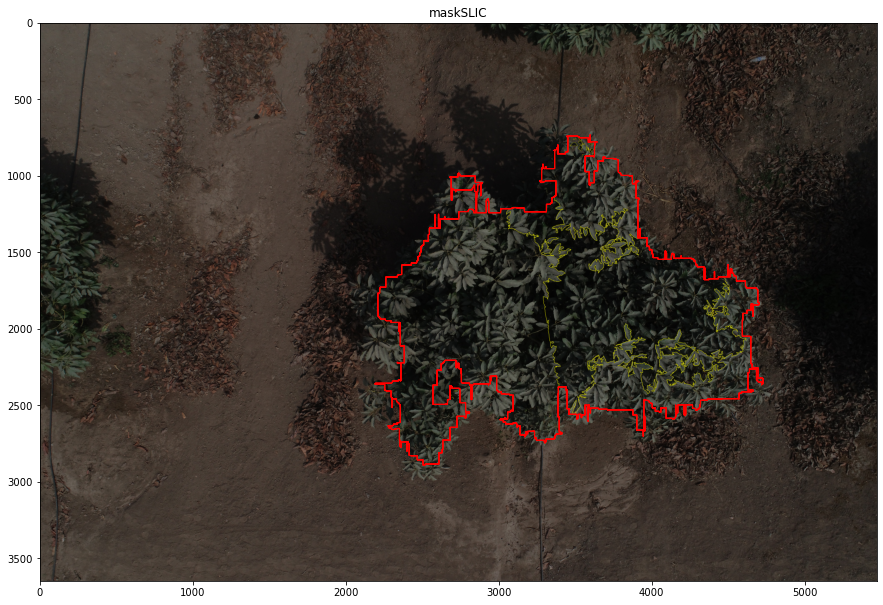

In [93]:
fig, ax1 = plt.subplots(1, 1, sharex=True, sharey=True, figsize=(15, 15))

ax1.imshow(segmentation.mark_boundaries(img, m_slic))
ax1.contour(re[0], colors='red', linewidths=1)
ax1.set_title('maskSLIC')

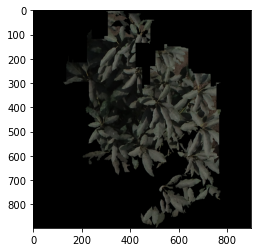

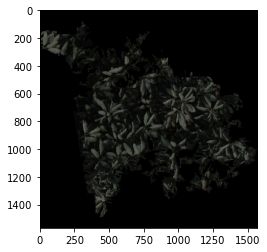

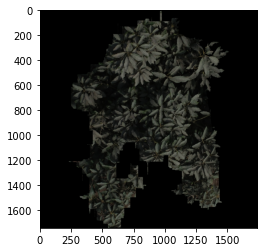

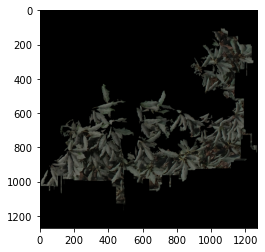

In [101]:
for i in range(1,5):
    x_min,x_max,y_min,y_max=square_reg(m_slic==i)
    N=i
    plt.imshow((img*np.stack((m_slic==N,m_slic==N,m_slic==N),axis=2))[x_min:x_max,y_min:y_max])
    plt.show()
#plt.imshow(m_slic)

In [83]:
def square_reg(mask):
    x_min=np.min(np.where(mask==1)[0])
    y_min=np.min(np.where(mask==1)[1])
    x_max=np.max(np.where(mask==1)[0])
    y_max=np.max(np.where(mask==1)[1])
    
    smk=np.zeros(mask.shape)
    Lx=x_max-x_min
    Ly=y_max-y_min
    if Lx<smk.shape[1] and Ly<smk.shape[0]:
        if (Lx)>(Ly):
            d=np.floor((abs((Ly)-(Lx)))/2)
            dL=d
            dR=d+2*((abs((Ly)-(Lx)))/2-d)
            if (y_min-dL)<=0:
                y_max=int(y_max+dR-(y_min-dL))
                y_min=0
            elif (y_max+dR)>=smk.shape[1]:
                y_min=int(y_min-(dL+((y_max+dR)-smk.shape[1])))
                y_max=smk.shape[1]
            else:
                y_min=int(y_min-dL)
                y_max=int(y_max+dR)
        else:
            d=np.floor((abs((Ly)-(Lx))/2))
            dL=d
            dR=d+2*((abs((Ly)-(Lx)))/2-d)
            if (x_min-dL)<=0:
                x_max=int(x_max+dR-(x_min-dL))
                x_min=0
            elif (x_max+dR)>=smk.shape[0]:
                x_min=int(x_min-(dL+((x_max+dR)-smk.shape[0])))
                x_max=smk.shape[0]
            else:
                x_min=int(x_min-dL)
                x_max=int(x_max+dR)
    
    return x_min,x_max,y_min,y_max

In [95]:
x_min,x_max,y_min,y_max=square_reg(m_slic==4)

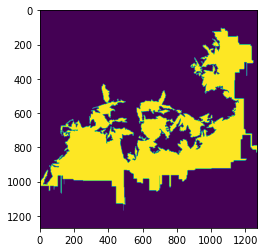

In [96]:
plt.imshow((m_slic==4)[x_min:x_max,y_min:y_max])

In [ ]:
from skimage import segmentation

def gen_seg(img,mask,n_seg,dir_name):
    m_slic=segmentation.slic(img,n_seg,min_size_factor=0.2,mask=mask,slic_zero=False)
    for i in np.unique(m_slic)[1:]:
        N=i
        x_min,x_max,y_min,y_max=square_reg(m_slic==i)
        rimg=(img*np.stack((m_slic==N,m_slic==N,m_slic==N),axis=2))[x_min:x_max,y_min:y_max]
        
        plt.imshow(rimg)
        plt.show()
        #SAVE rimg

In [99]:
for i in np.unique(m_slic)[1:]:
    print(i)

1
2
3
4
